# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão logistica e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv e faça o download do conjunto de dados.

In [ ]:
# Bibliotecas

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# metricas usadas para classificacao
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/dataR2.csv')

In [ ]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


## Sumário de análise das variáveis

(116, 10) 


Coluna Age

count    116.000000
mean      57.301724
std       16.112766
min       24.000000
25%       45.000000
50%       56.000000
75%       71.000000
max       89.000000
Name: Age, dtype: float64 

Nulos: False

[48 83 82 68 86 49 89 76 73 75 34 29 25 24 38 44 47 61 64 32 36 35 54 45
 50 66 53 28 43 51 67 69 60 77 71 78 85 42 62 59 46 72 55 41 81 65 58 40
 52 74 57]


---------------------------------------------------------------------------------------------


Coluna BMI

count    116.000000
mean      27.582111
std        5.020136
min       18.370000
25%       22.973205
50%       27.662416
75%       31.241442
max       38.578759
Name: BMI, dtype: float64 

Nulos: False

[23.5        20.69049454 23.12467037 21.36752137 21.11111111 22.85445769
 22.7        23.8        22.         23.         21.47       23.01
 22.86       18.67       23.34       20.76       22.03       32.03895937
 34.5297228  36.51263743 28.57667585 31.97501487 32.27078777 30.27681661
 30.48315806 37.03

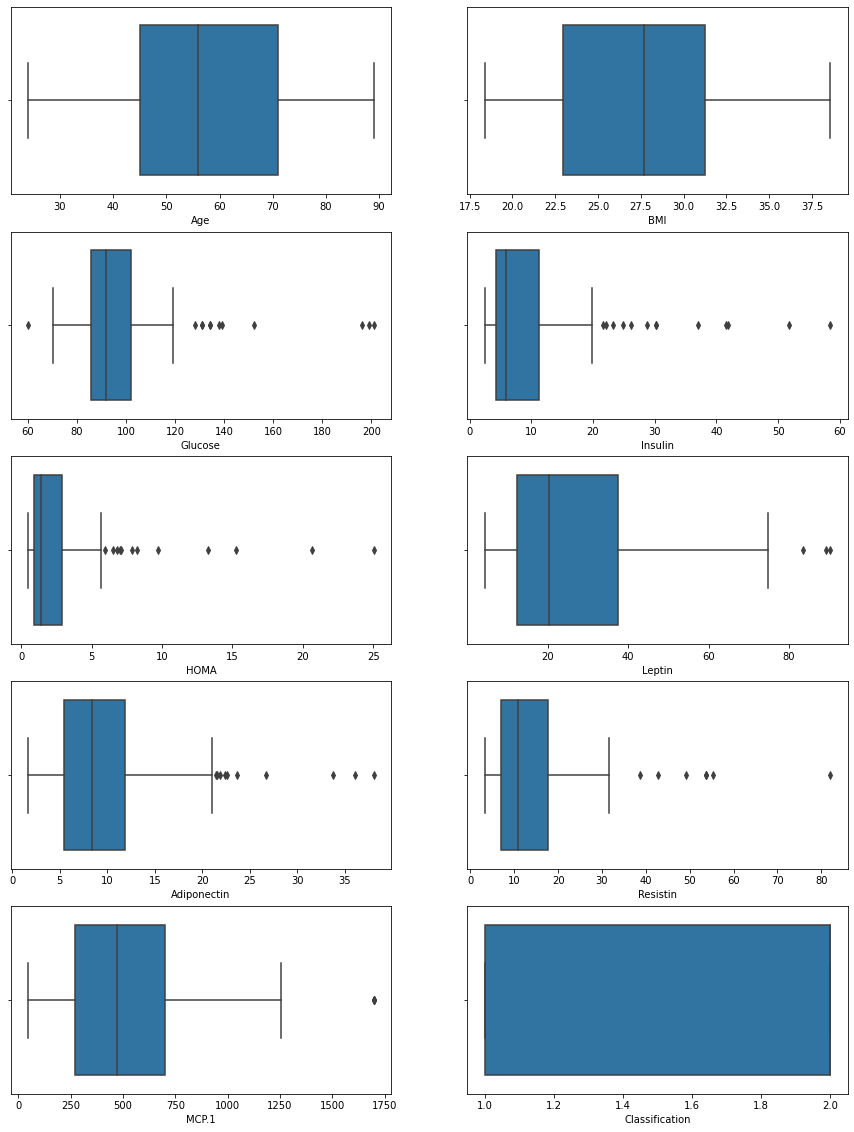

In [ ]:
print(df.shape,"\n\n")
plt.subplots(5, 2, figsize=(15,20))
for i in range(0,len(df.columns)):
  print(f"Coluna {df.columns[i]}\n")
  print(df.iloc[:,i].describe(),"\n")
  print(f"Nulos: {df.iloc[:,i].isnull().any()}\n")
  print(df.iloc[:,i].unique())
  print("\n\n---------------------------------------------------------------------------------------------\n\n")
  plt.subplot(5, 2, i+1)
  sns.boxplot(x = df.iloc[:,i])

plt.show()

Conclusão sobre os dados:

Os dados não apresentam dados nulos e nem dados não numéricos, o único ponto de atenção está em torno dos outliers (indicados no boxplot ao fim da analise). Decidi por manter os outliers uma vez que tais dados podem ser os indicativos da presença de câncer.

# Exercicio 1. (2.0 pontos)

Escreva em até quatro frases, uma breve apresentação sobre suas ideias do conjunto de dados e adicione qualquer contexto que possa ajudar os leitores a entendê-la.

**RESPOSTA** (VALE 2.0 pontos):  
Segundo dados do INCA, no Brasil, o câncer de mama é o tipo de câncer mais comum em mulheres, estima-se que em 2022 ocorrerão 66.280 casos novos da doença. Diante deste cenário, a medicina preventiva tenta evitar que procedimentos mais invasivos sejam realizados através da prevenção e detecção do câncer. O papel de um cientista de dados está diretamente ligado ao diagnóstico precoce do câncer através da identificação de padrões e relações entre indicadores normalmente associados a pessoas doentes.
<br><br> 
#### Referências:  
INSTITUTO NACIONAL DE CÂNCER JOSÉ ALENCAR GOMES DA SILVA. Estimativa 2020: incidência do Câncer no Brasil. Rio de Janeiro: INCA, 2019. Disponível em: https://www.inca.gov.br/sites/ufu.sti.inca.local/files//media/document//estimativa-2020-incidencia-de-cancer-no-brasil.pdf Acesso em: 27 abril 2022

# Exercicio 2. (3.0 pontos)

Explore seu conjunto de dados e crie uma história em torno deles! Pense sobre o objetivo que deseja transmitir para seus leitores.

**RESPOSTA** (VALE 0.6 pontos):  
Nossa função, neste conjunto de dados, é analisar como as 9 variáveis apresentadas estão relacionadas a presença ou não de câncer, servindo como auxilio a medicina preventiva. Como estamos lidando com uma classificação binária (1 - Sem Câncer e 2 - Com Câncer), numa análise primária, devemos "resumir" o conjunto de dados e tentar verificar se tais relações realmente existem. Confirmando as relações, podemos prosseguir para a criação de modelos preditivos baseados nas informações apresentadas.

Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

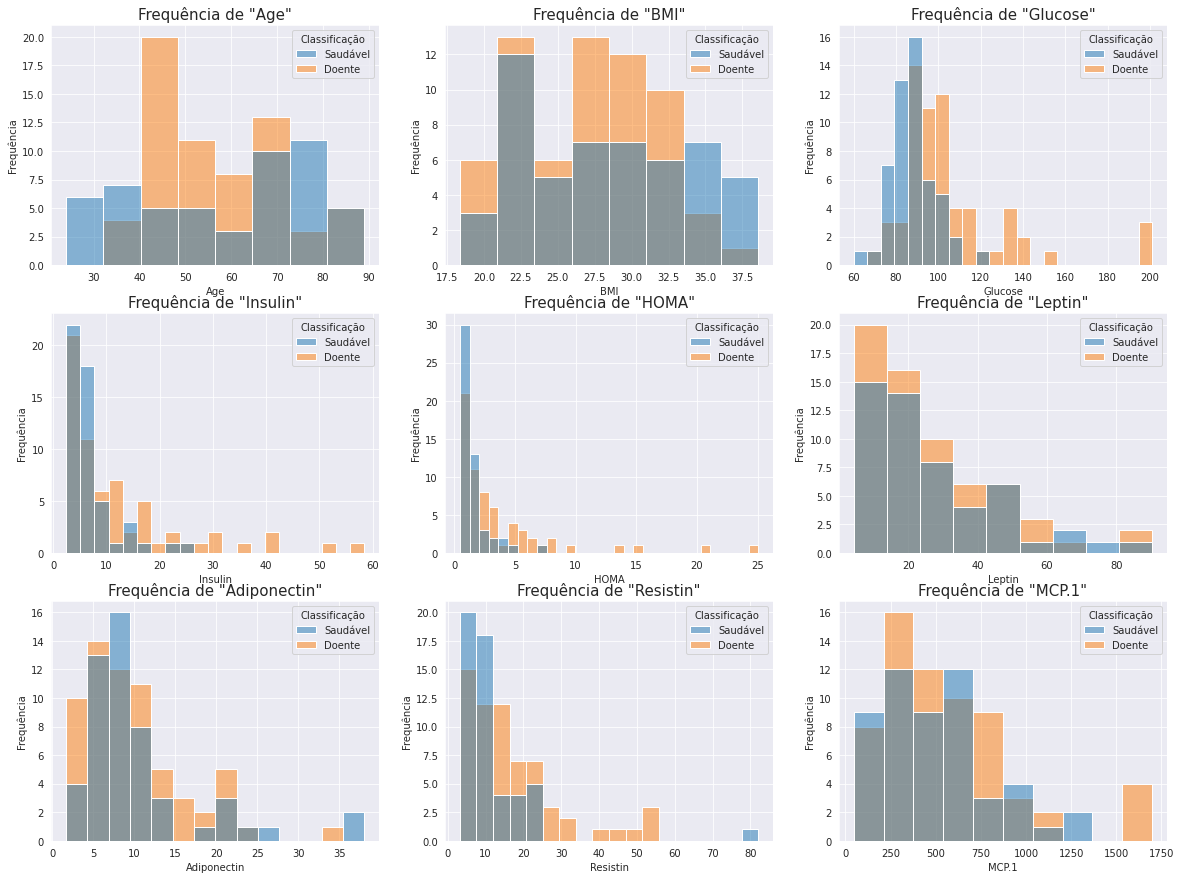

In [ ]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

rotulo = df['Classification'].copy()
rotulo[rotulo == 1] = 'Saudável'
rotulo[rotulo == 2] = 'Doente'

sns.set_style('darkgrid')
plt.subplots(3, 3, figsize=(20,15))

for i in range(0,len(df.drop('Classification', axis=1).columns)):
  plt.subplot(3,3,(i+1))
  sns.histplot(x = df.columns[i], data = df, hue = rotulo, palette = 'tab10').legend_.set_title('Classificação')
  plt.ylabel('Frequência', size = 10)
  plt.title(f'Frequência de "{df.columns[i]}"', size = 15)

plt.show()

Obtenha o feedback de suas ideias e de sua(s) visualização(ões), se possivel apresente esse grafico com pelo menos uma outra pessoa e questione:

1. O que você percebe na visualização?  
2. Quais perguntas você tem sobre o conjunto de dados?  
3. Há algo que você não entende nas visualizações?

**RESPOSTA** (VALE 0.6 pontos):  

As perguntas foram feitas a uma pessoa sem conhecimento tanto na área médica quanto na área de dados.
1. O que você percebe na visualização?  
As probabilidades de uma pessoa vir a ter câncer basedo nas estatisticas apresentadas.
2. Quais perguntas você tem sobre o conjunto de dados?  
Quantas amostras?  
Essas amostras foram feitas em localidades distintas?  
Se há diferença de localidade, há diferenças entre hábitos alimentares?  
Existem pessoas com doenças pré-existentes?
3. Há algo que você não entende nas visualizações?  
A função da cor cinza não está clara.

Após o feedback, o que você mudaria?

**RESPOSTA** (VALE 0.6 pontos):  
Principalmente a cor cinza. Adicionar cores a um histograma parte da ideia de separar os valores em duas classes e representar a proporção entre os dois grupos, algo que não estava sendo atingido com a presença da cor cinza.
<br><br>
A função "histplot" da biblioteca "seaborn" utiliza como padrão a distribuição em camadas quando grupos são separados dentro do histograma, ou seja, a cor cinza tratava-se de barras azuis e laranjas sobrepostas. Diante deste problema, resolvi eliminar completamente a presença da "barra cinza" alterando a forma que a função "histplot" lida com grupos, ao invés de camadas optei por empilhar as barras.

Apresente suas nova(s) visualização(ões) a partir do feedback:

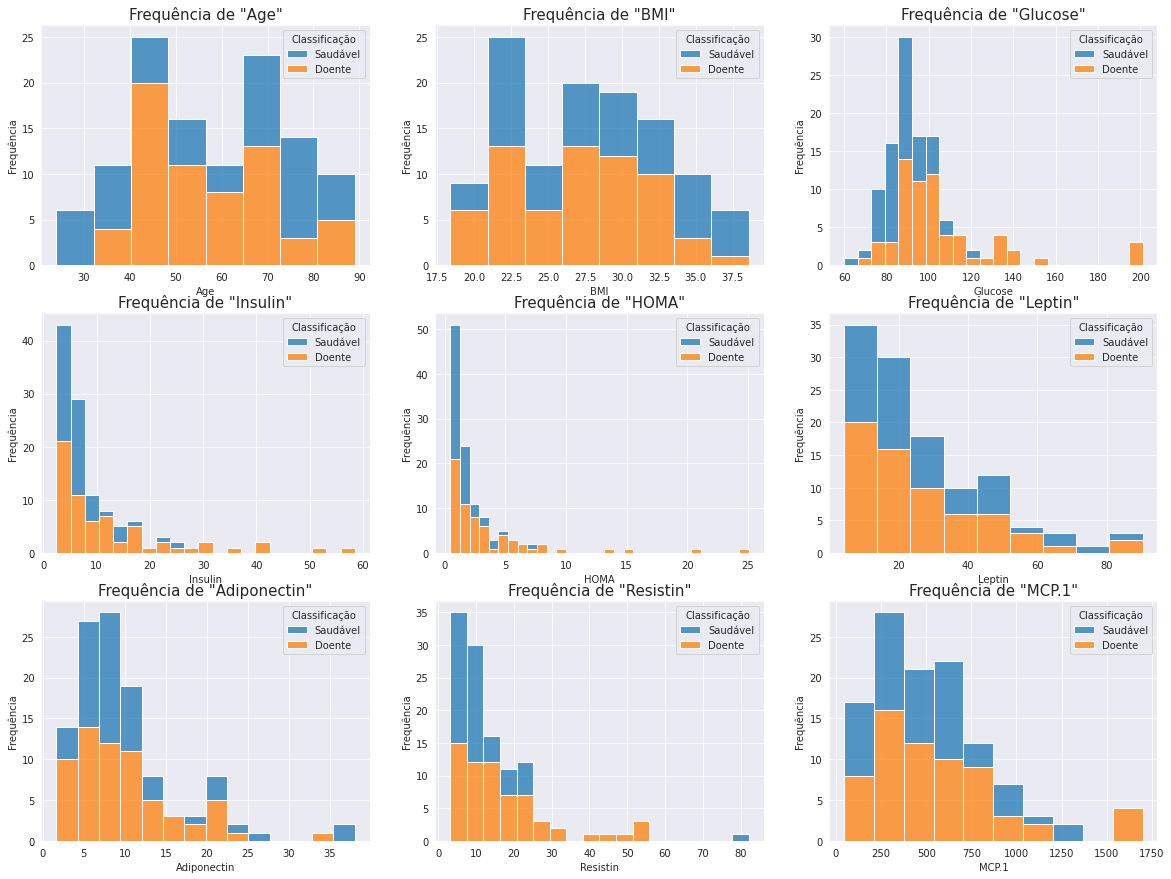

In [ ]:
#### VALE 0.6 pontos
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

rotulo = df['Classification'].copy()
rotulo[rotulo == 1] = 'Saudável'
rotulo[rotulo == 2] = 'Doente'

sns.set_style('darkgrid')
plt.subplots(3, 3, figsize=(20,15))

for i in range(0,len(df.drop('Classification', axis=1).columns)):
  plt.subplot(3,3,(i+1))
  sns.histplot(x = df.columns[i], data = df, hue = rotulo, palette = 'tab10', multiple="stack").legend_.set_title('Classificação')
  plt.ylabel('Frequência', size = 10)
  plt.title(f'Frequência de "{df.columns[i]}"', size = 15)

plt.show()

# Exercicio 3. (5.0 pontos)

Construa um modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

In [ ]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X = df.drop('Classification', axis = 1).copy()
y = df['Classification'].copy()

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [ ]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716


In [ ]:
y = y.map({1:0,
           2:1})

# 1 > Classe negativa, sem cancer
# 2 > Classe positiva, com cancer

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
111    1
112    1
113    1
114    1
115    1
Name: Classification, Length: 116, dtype: int64

In [ ]:
modelo = sm.Logit(y,X)
reg_log = modelo.fit()

Optimization terminated successfully.
         Current function value: 0.499549
         Iterations 7


Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [ ]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

print(reg_log.summary())

                           Logit Regression Results                           
Dep. Variable:         Classification   No. Observations:                  116
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.2737
Time:                        19:24:46   Log-Likelihood:                -57.948
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 6.564e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.3587      0.251     -1.432      0.152      -0.850       0.132
BMI            -0.7561      0.333     -2.273      0.023      -1.408      -0.104
Glucose         2.3752      0.598      3.971    

Faça outro modelo usando a biblioteca **sklearn** e usem o parametro **random_state** com valor 10.

In [ ]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X = df.drop('Classification', axis = 1).copy()
y = df['Classification'].copy()

y = y.map({1:0,
           2:1})

# 1 > Classe negativa, sem cancer
# 2 > Classe positiva, com cancer

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

modelo_scikit = LogisticRegression()
modelo_scikit.fit(X_train,y_train)
y_pred = modelo_scikit.predict(X_test)

Coloque abaixo a matriz de confusão do modelo feito:

In [ ]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito benigno","Predito maligno",],
             index  =["Verdadeiro benigno", "Verdadeiro maligno"])

conf_matrix

,Predito benigno,Predito maligno
Verdadeiro benigno,13,3
Verdadeiro maligno,3,16


Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [ ]:
acuracia = accuracy_score(y_test,y_pred) # (conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1])/(conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0])
precisao = precision_score(y_test,y_pred) # conf_matrix.iloc[1,1]/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1])
especificidade = conf_matrix.iloc[0,0]/(conf_matrix.iloc[0,0]+conf_matrix.iloc[0,1])
recall = recall_score(y_test,y_pred)  # conf_matrix.iloc[1,1]/(conf_matrix.iloc[1,1] + conf_matrix.iloc[1,0])

In [ ]:
# VALE 0.8 pontos
# Substitua __ pelos valores solicitados
print('acurácia: {}'.format(acuracia))
print('precisão: {}'.format(precisao))
print('especificidade: {}'.format(especificidade))
print('sensitividade: {}'.format(recall))

acurácia: 0.8285714285714286
precisão: 0.8421052631578947
especificidade: 0.8125
sensitividade: 0.8421052631578947


Observando a matriz de confusão, o seu modelo tende a obter mais erros do tipo I ou do tipo II?

**RESPOSTA** (VALE 1.0 ponto):  
Tivemos 3 erros tipo I (Falso Positivo) em 16 amostras da classe negativa.  
Tivemos 3 erros tipo II (Falso Negativo) em 19 amostras da classe positiva.  
Além disso, a pior métrica do modelo é a **especificidade**.  
Tanto a métrica quanto os valores absolutos da matriz de confusão mostram que o nosso modelo falha em identificar verdadeiros negativos e, consequentemente, gera mais erros do tipo I (Falsos Positivos).